In [1]:
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import pickle
import graphviz 

# Import Dataset

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Data

In [4]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=0)

## Decision Tree Classifier

[Text(0.6495726495726496, 0.95, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(0.5042735042735043, 0.85, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(0.4188034188034188, 0.75, 'X[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(0.3504273504273504, 0.65, 'X[13] <= 91.555\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(0.3162393162393162, 0.55, 'X[6] <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(0.2222222222222222, 0.45, 'X[13] <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(0.13675213675213677, 0.35, 'X[14] <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(0.06837606837606838, 0.25, 'X[26] <= 0.195\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.03418803418803419, 0.15, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.10256410256410256, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.20512820512820512, 0.25, 'X[21] <= 32.83\ngini = 

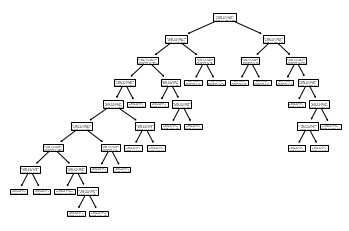

In [5]:
from sklearn import tree
clf =tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

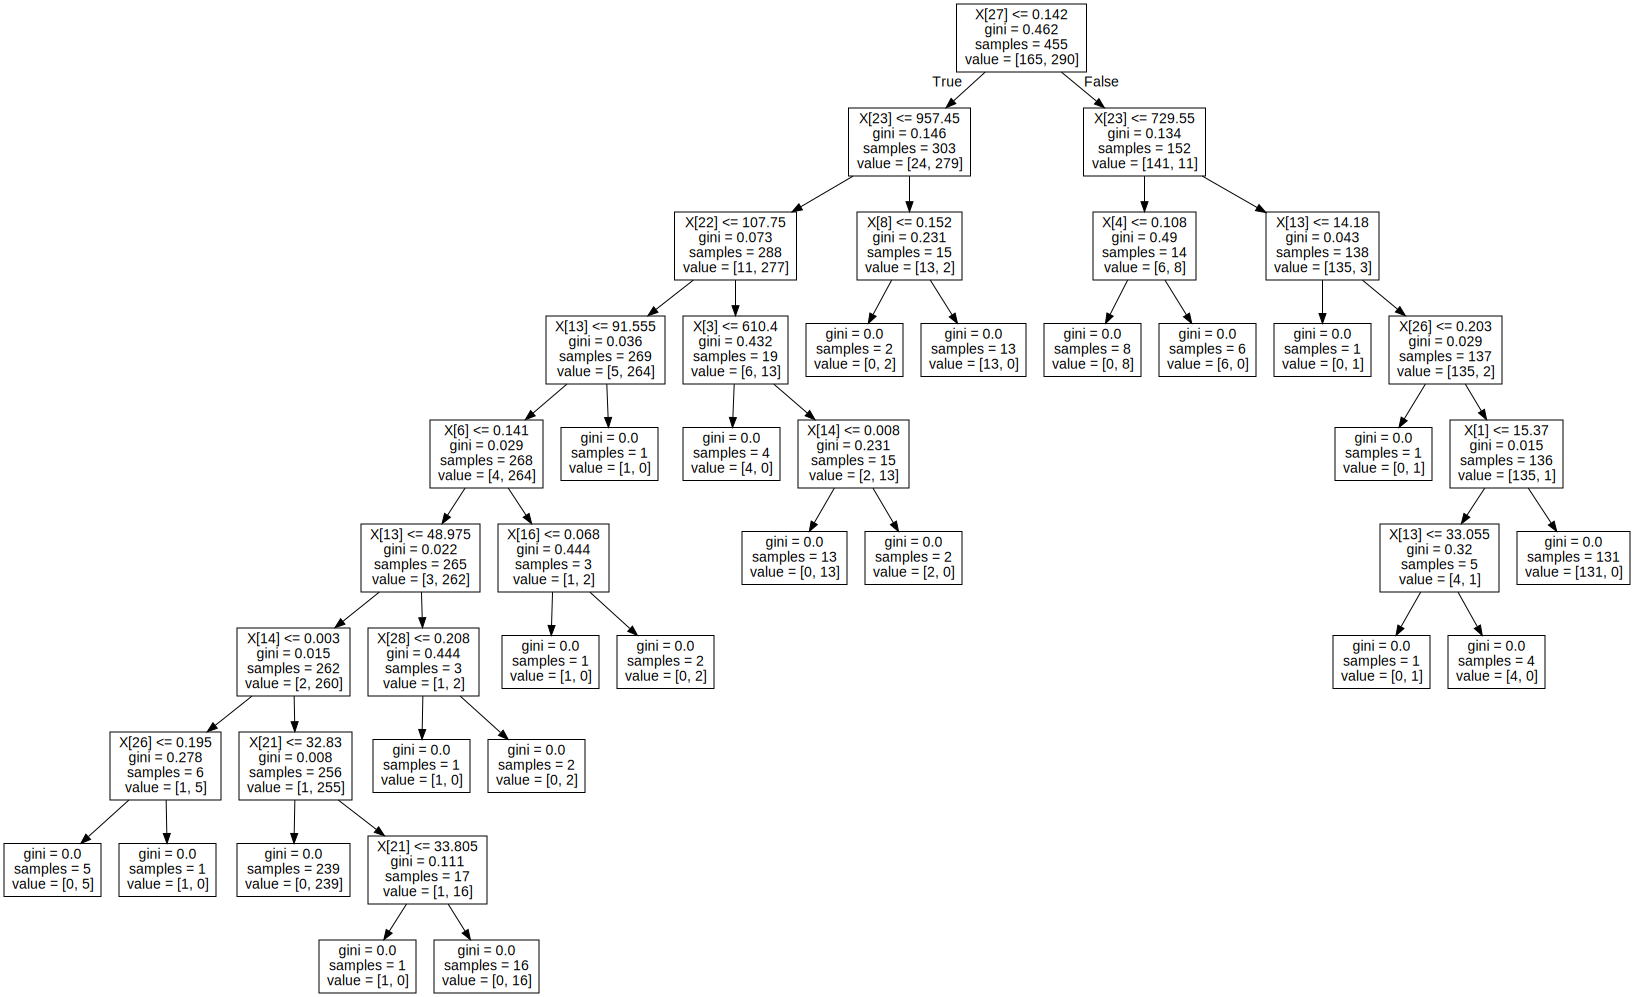

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("")
graph

### Save Model to Pickle

In [7]:
pickle.dump(clf, open('tree_learning.pkl', 'wb'))

### Load Model from Pickle

In [8]:
decision_tree_learning = pickle.load(open('tree_learning.pkl', 'rb'))
y_pred = decision_tree_learning.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1])

In [9]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, y_pred))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, y_pred,average='weighted'))
print("Precision Score\t: %f" %sklearn.metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall Score\t: %f" %sklearn.metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy score	: 0.912281
F1 Score	: 0.912721
Precision Score	: 0.915426
Recall Score	: 0.912281


In [10]:
print("Confusion Matrix :")
sklearn.metrics.confusion_matrix(y_test, y_pred)

Confusion Matrix :


array([[44,  3],
       [ 7, 60]], dtype=int64)